In [108]:
import pandas as pd
from scipy.spatial.distance import pdist, squareform, cdist
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
df = pd.read_csv("phoible.csv")

/tmp/ipykernel_35069/3549965252.py:1: DtypeWarning: Columns (4,7,8,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("phoible.csv")


In [110]:
unique_segments = df.drop_duplicates(subset='Phoneme')

In [111]:
feature_matrix = unique_segments[['Phoneme', 'tone', 'stress', 'syllabic', 'short', 'long', 'consonantal',
       'sonorant', 'continuant', 'delayedRelease', 'approximant', 'tap',
       'trill', 'nasal', 'lateral', 'labial', 'round', 'labiodental',
       'coronal', 'anterior', 'distributed', 'strident', 'dorsal', 'high',
       'low', 'front', 'back', 'tense', 'retractedTongueRoot',
       'advancedTongueRoot', 'periodicGlottalSource', 'epilaryngealSource',
       'spreadGlottis', 'constrictedGlottis', 'fortis', 'lenis',
       'raisedLarynxEjective', 'loweredLarynxImplosive', 'click']].set_index("Phoneme")

In [134]:
def all_phonemes(correspondences):
    return set(map(lambda x: x[0], correspondences)) 

def feature_submatrix(phonemes):
    return feature_matrix.loc[list(phonemes)].replace({'+': 1, '-': 0, '+,-': 1, '-,+': 1}).fillna(0).astype(int)

def phoneme_clusters(correspondences):
    phonemes = all_phonemes(correspondences)
    features = feature_submatrix(phonemes)
    distance = pdist(features.values, metric='hamming')
    Z = linkage(distance, method='average')
    return Z, features

def grapheme_clusters(correspondences):
    phonemes = all_phonemes(correspondences)
    features = feature_submatrix(phonemes)
    mean_features = {}
    right_values = {}
    for left, right in correspondences:
        if right not in right_values:
            right_values[right] = []
        right_values[right].append(left)
    for right, lefts in right_values.items():
        mean_features[right.upper()] = features.loc[lefts].mean()
    df = pd.DataFrame(mean_features).T
    distances = pdist(df.values, metric='euclidean')
    Z = linkage(distances, method='average')
    return Z, df

In [135]:
def top_n_matches(row, n=3):
    sorted_indices = row.sort_values()
    top_n = sorted_indices.iloc[:n]
    out = {}
    for i, (phoneme, dist) in enumerate(top_n.items(), start=1):
        out[f'fit_{i}'] = phoneme
        out[f'dist_{i}'] = dist
    return pd.Series(out)

In [136]:
koine_3_bc_correspondences = {
    ("i", "ι"),
    ("iː", "ι"),
    ("iː", "ει"),
    ("iː", "ηι"),
    ("y", "υ"),
    ("yː", "υ"),
    ("u", "ου"),
    ("uː", "ου"),
    ("e̞", "ε"),
    ("e̞ː", "ει"),
    ("e̞ː", "η"),
    ("o̞", "ο"),
    ("o̞ː", "ω"),
    ("o̞ː", "ωι"),
    ("a", "α"),
    ("aː", "α"),
    #("w", "υ"), # semivocalic /u/
    #("j", "ι"), # semivocalic /i/
    ("p", "π"),
    ("b", "β"),
    ("pʰ", "φ"),
    ("m", "μ"),
    ("t", "τ"),
    ("d", "δ"),
    ("tʰ", "θ"),
    ("n", "ν"),
    ("r", "ρ"),
    ("s", "σ"),
    ("l", "λ"),
    ("k", "κ"),
    ("ɡ", "γ"),
    ("kʰ", "χ"),
    ("h", "ϩ"),
}

/tmp/ipykernel_35069/3663722461.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return feature_matrix.loc[list(phonemes)].replace({'+': 1, '-': 0, '+,-': 1, '-,+': 1}).fillna(0).astype(int)


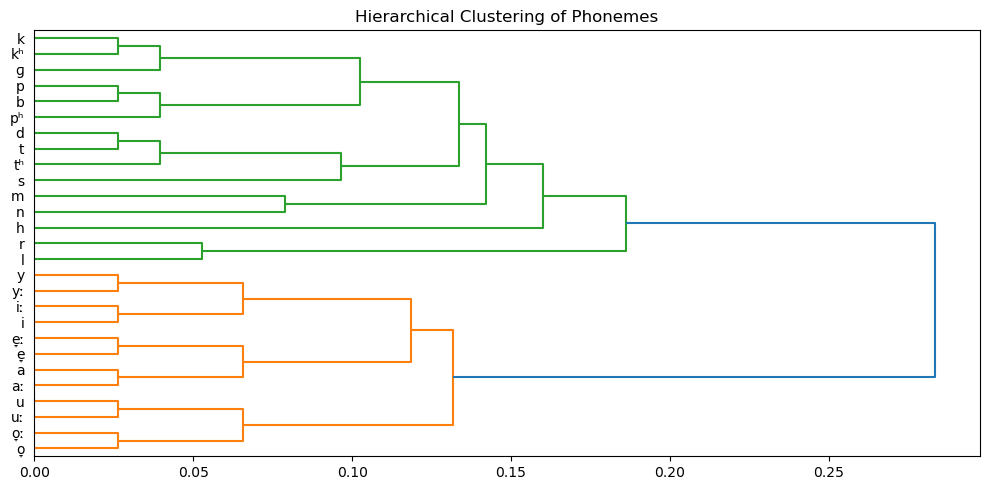

/tmp/ipykernel_35069/3663722461.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return feature_matrix.loc[list(phonemes)].replace({'+': 1, '-': 0, '+,-': 1, '-,+': 1}).fillna(0).astype(int)


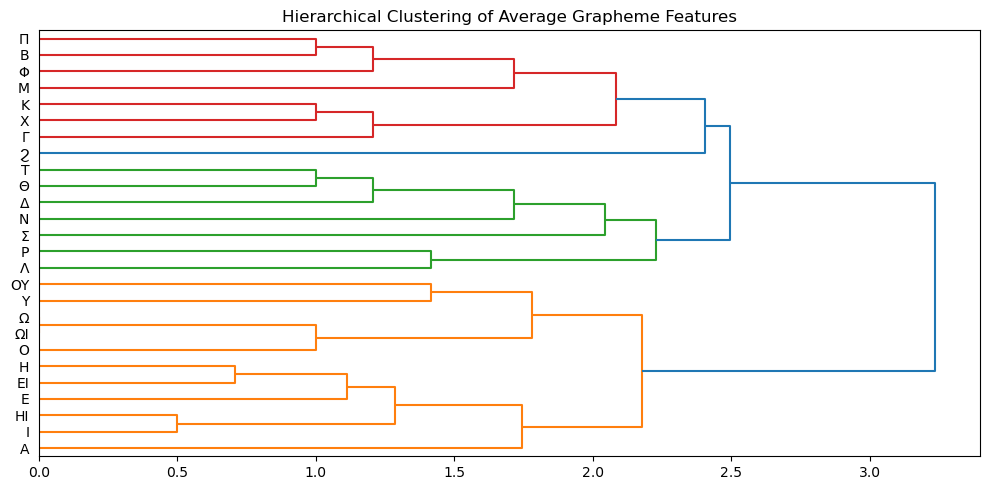

In [137]:
Z, df = phoneme_clusters(koine_3_bc_correspondences)
plt.figure(figsize=(10, 5))
dendrogram(Z, labels=df.index.tolist(), orientation='right')
plt.title("Hierarchical Clustering of Phonemes")
plt.tight_layout()
plt.show()

Z, df = grapheme_clusters(koine_3_bc_correspondences)
plt.figure(figsize=(10, 5))
dendrogram(Z, labels=df.index.tolist(), orientation='right')
plt.title("Hierarchical Clustering of Average Grapheme Features")
plt.tight_layout()
plt.show()

In [138]:
koine_2_bc_correspondences = {
    ("i", "ι"),
    ("i", "ει"),
    ("i", "ηι"),
    ("y", "υ"),
    ("u", "ου"),
    ("e̞", "ε"),
    ("e̞", "αι"),
    ("e̝", "ει"),
    ("e̝", "η"),
    ("ø", "οι"),
    ("o̞", "ο"),
    ("o̞", "ω"),
    ("o̞", "ωι"),
    ("a", "α"),
    ("a", "αι"), # long āi
    ("i", "η"), # in /iw/
    #("w", "υ"), # semivocalic variant of /u/
    #("j", "ι"), # semivocalic variant of /i/
    ("p", "π"),
    ("b", "β"),
    ("pʰ", "φ"),
    ("z", "ζ"),
    ("m", "μ"),
    ("t", "τ"),
    ("d", "δ"),
    ("tʰ", "θ"),
    ("n", "ν"),
    ("r", "ρ"),
    ("s", "σ"),
    ("l", "λ"),
    ("k", "κ"),
    ("ɣ", "γ"),
    ("kʰ", "χ"),
    ("h", "ϩ"),
}

/tmp/ipykernel_35069/3663722461.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return feature_matrix.loc[list(phonemes)].replace({'+': 1, '-': 0, '+,-': 1, '-,+': 1}).fillna(0).astype(int)


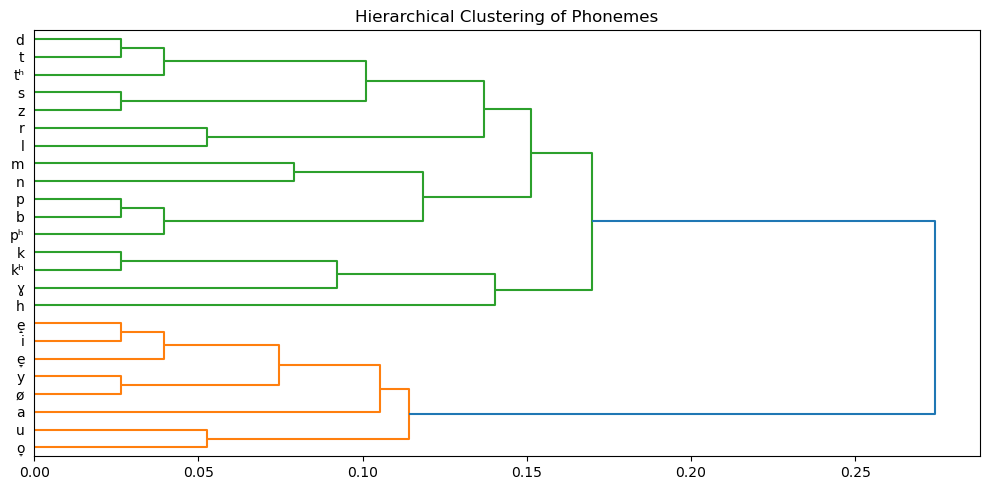

/tmp/ipykernel_35069/3663722461.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return feature_matrix.loc[list(phonemes)].replace({'+': 1, '-': 0, '+,-': 1, '-,+': 1}).fillna(0).astype(int)


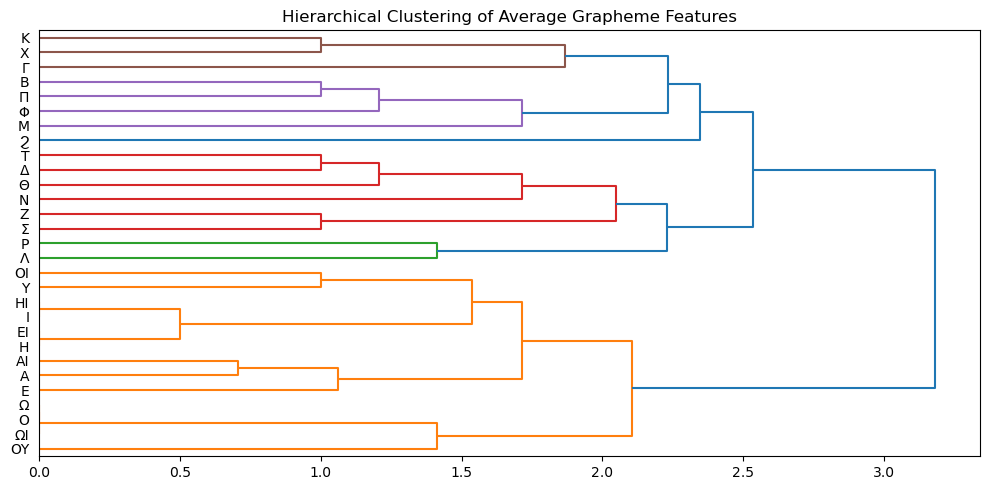

In [139]:
Z, df = phoneme_clusters(koine_2_bc_correspondences)
plt.figure(figsize=(10, 5))
dendrogram(Z, labels=df.index.tolist(), orientation='right')
plt.title("Hierarchical Clustering of Phonemes")
plt.tight_layout()
plt.show()

Z, df = grapheme_clusters(koine_2_bc_correspondences)
plt.figure(figsize=(10, 5))
dendrogram(Z, labels=df.index.tolist(), orientation='right')
plt.title("Hierarchical Clustering of Average Grapheme Features")
plt.tight_layout()
plt.show()

In [140]:
koine_4_ad_correspondences = {
    ("i", "ι"),
    ("i", "ει"),
    ("i", "ηι"),
    ("i", "η"),
    ("y", "υ"),
    ("y", "οι"),
    ("y", "υι"),
    ("u", "ου"),
    ("e̞", "ει"),
    ("e̞", "αι"),
    ("o̞", "ο"),
    ("o̞", "ω"),
    ("o̞", "ωι"),
    ("a", "α"),
    ("a", "αι"), # long āi
    ("p", "π"),
    ("v", "β"),
    ("f", "φ"),
    ("z", "ζ"),
    ("m", "μ"),
    ("t", "τ"),
    ("ð", "δ"),
    ("θ", "θ"),
    ("n", "ν"),
    ("r", "ρ"),
    ("s", "σ"),
    ("l", "λ"),
    ("k", "κ"),
    ("ɣ", "γ"),
    ("x", "χ"),
}

/tmp/ipykernel_35069/3663722461.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return feature_matrix.loc[list(phonemes)].replace({'+': 1, '-': 0, '+,-': 1, '-,+': 1}).fillna(0).astype(int)


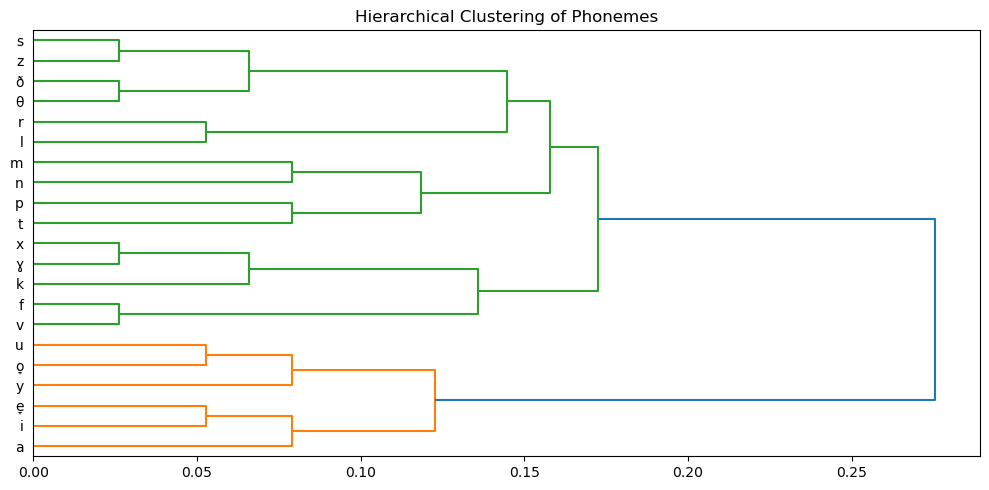

/tmp/ipykernel_35069/3663722461.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return feature_matrix.loc[list(phonemes)].replace({'+': 1, '-': 0, '+,-': 1, '-,+': 1}).fillna(0).astype(int)


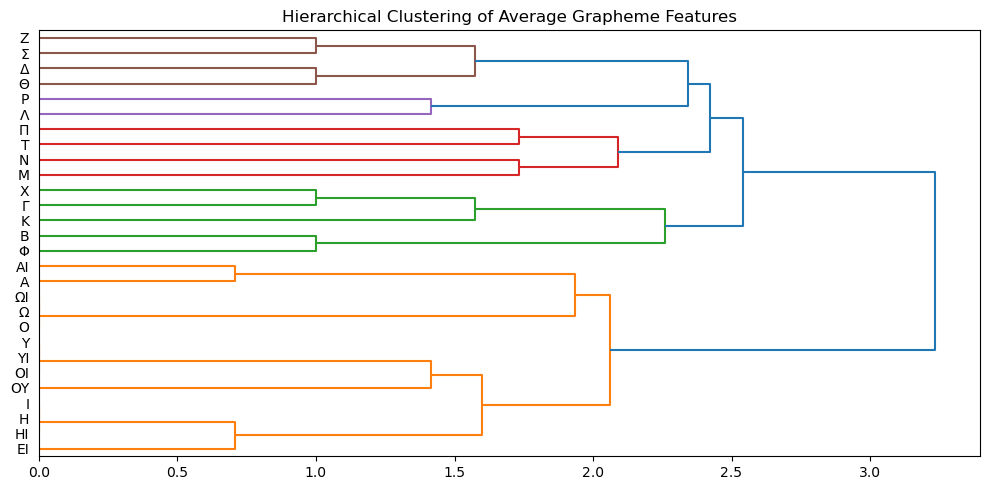

In [141]:
Z, df = phoneme_clusters(koine_4_ad_correspondences)
plt.figure(figsize=(10, 5))
dendrogram(Z, labels=df.index.tolist(), orientation='right')
plt.title("Hierarchical Clustering of Phonemes")
plt.tight_layout()
plt.show()

Z, df = grapheme_clusters(koine_4_ad_correspondences)
plt.figure(figsize=(10, 5))
dendrogram(Z, labels=df.index.tolist(), orientation='right')
plt.title("Hierarchical Clustering of Average Grapheme Features")
plt.tight_layout()
plt.show()

In [142]:
middle_14_ad_correspondences = {
    ("i", "ι"),
    ("i", "ει"),
    ("i", "ηι"),
    ("i", "η"),
    ("i", "υ"),
    ("i", "οι"),
    ("i", "υι"),
    ("u", "ου"),
    ("e̞", "ει"),
    ("e̞", "αι"),
    ("o̞", "ο"),
    ("o̞", "ω"),
    ("o̞", "ωι"),
    ("a", "α"),
    ("a", "αι"), # long āi
    ("p", "π"),
    ("v", "β"),
    ("f", "φ"),
    ("z", "ζ"),
    ("m", "μ"),
    ("t", "τ"),
    ("ð", "δ"),
    ("θ", "θ"),
    ("n", "ν"),
    ("r", "ρ"),
    ("s", "σ"),
    ("l", "λ"),
    ("k", "κ"),
    ("ɣ", "γ"),
    ("x", "χ"),
}

/tmp/ipykernel_35069/3663722461.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return feature_matrix.loc[list(phonemes)].replace({'+': 1, '-': 0, '+,-': 1, '-,+': 1}).fillna(0).astype(int)


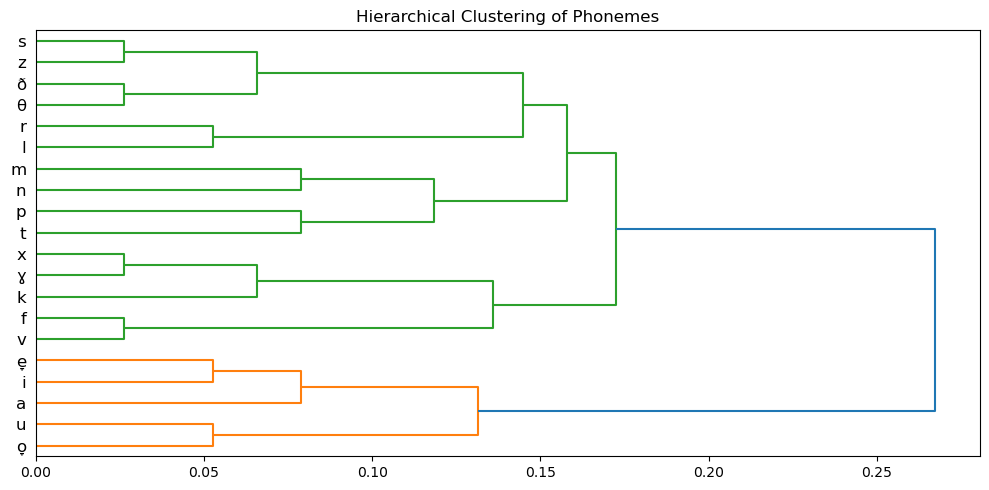

/tmp/ipykernel_35069/3663722461.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return feature_matrix.loc[list(phonemes)].replace({'+': 1, '-': 0, '+,-': 1, '-,+': 1}).fillna(0).astype(int)


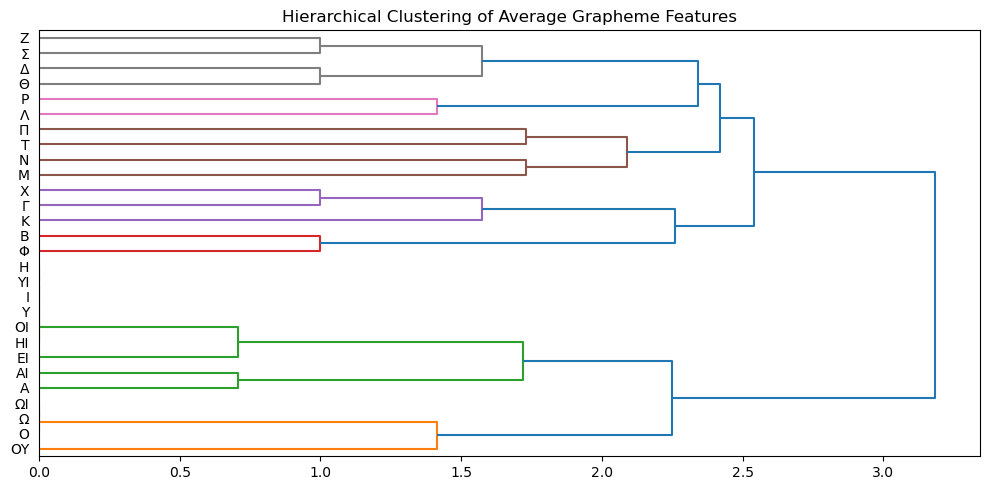

In [143]:
Z, df = phoneme_clusters(middle_14_ad_correspondences)
plt.figure(figsize=(10, 5))
dendrogram(Z, labels=df.index.tolist(), orientation='right')
plt.title("Hierarchical Clustering of Phonemes")
plt.tight_layout()
plt.show()

Z, df = grapheme_clusters(middle_14_ad_correspondences)
plt.figure(figsize=(10, 5))
dendrogram(Z, labels=df.index.tolist(), orientation='right')
plt.title("Hierarchical Clustering of Average Grapheme Features")
plt.tight_layout()
plt.show()

In [144]:
sahidic_correspondences = {
    ("i", "ει"),
    ("i", "ι"),
    ("u", "ου"),
    ("e", "η"),
    ("ɛ", "ε"),
    ("o", "ω"),
    ("ɔ", "ο"),
    ("a", "α"),
    ("p", "π"),
    ("m", "μ"),
    ("f", "ϥ"),
    ("β", "β"),
    ("t", "τ"),
    ("n", "ν"),
    ("s", "σ"),
    ("l", "λ"),
    ("r", "ρ"),
    ("ʃ", "ϣ"),
    ("t̠ʃ", "ϫ"),
    #("j", "ει"),
    ("kʲ", "ϭ"),
    ("k", "κ"),
    #("w", "ου"),
    ("h", "ϩ"),
}

/tmp/ipykernel_35069/3663722461.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return feature_matrix.loc[list(phonemes)].replace({'+': 1, '-': 0, '+,-': 1, '-,+': 1}).fillna(0).astype(int)


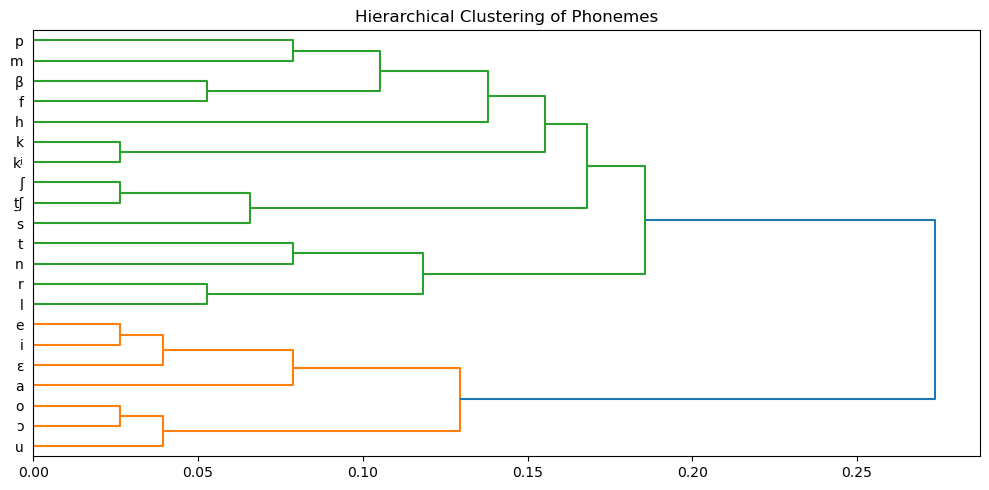

/tmp/ipykernel_35069/3663722461.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return feature_matrix.loc[list(phonemes)].replace({'+': 1, '-': 0, '+,-': 1, '-,+': 1}).fillna(0).astype(int)


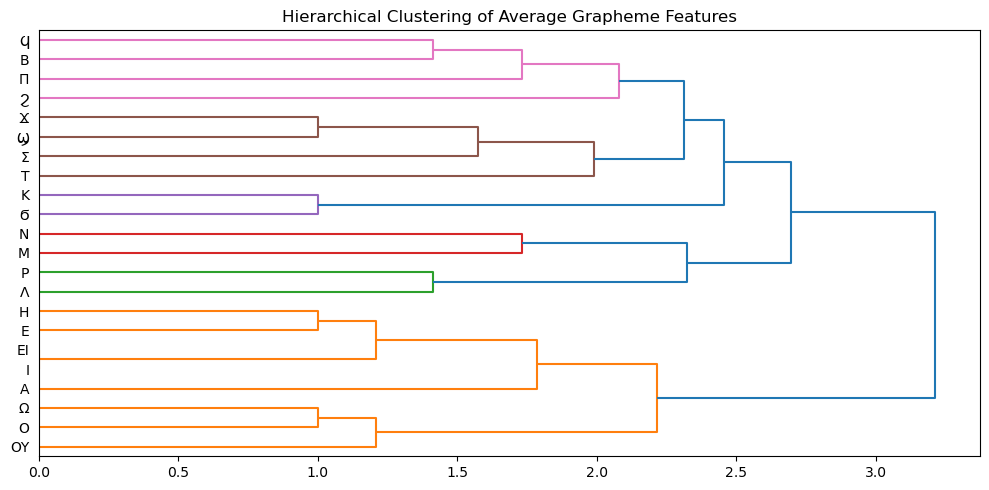

In [145]:
Z, df = phoneme_clusters(sahidic_correspondences)
plt.figure(figsize=(10, 5))
dendrogram(Z, labels=df.index.tolist(), orientation='right')
plt.title("Hierarchical Clustering of Phonemes")
plt.tight_layout()
plt.show()

Z, df = grapheme_clusters(sahidic_correspondences)
plt.figure(figsize=(10, 5))
dendrogram(Z, labels=df.index.tolist(), orientation='right')
plt.title("Hierarchical Clustering of Average Grapheme Features")
plt.tight_layout()
plt.show()

In [146]:
bohairic_correspondences = {
    ("i", "ι"),
    ("u", "ου"),
    ("e", "η"),
    ("ɛ", "ε"),
    ("o", "ω"),
    ("ɔ", "ο"),
    ("a", "α"),
    ("pʰ", "φ"),
    ("p", "π"),
    ("m", "μ"),
    ("f", "ϥ"),
    ("β", "β"),
    ("t", "τ"),
    ("tʰ", "θ"),
    ("n", "ν"),
    ("s", "σ"),
    ("l", "λ"),
    ("r", "ρ"),
    ("ʃ", "ϣ"),
    ("t̠ʃ", "ϫ"),
    #("j", "ι"),
    ("t̠ʃʰ", "ϭ"),
    ("k", "κ"),
    ("kʰ", "χ"),
    ("x", "ϧ"),
    #("w", "ου"),
    ("h", "ϩ"),
}

/tmp/ipykernel_35069/3663722461.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return feature_matrix.loc[list(phonemes)].replace({'+': 1, '-': 0, '+,-': 1, '-,+': 1}).fillna(0).astype(int)


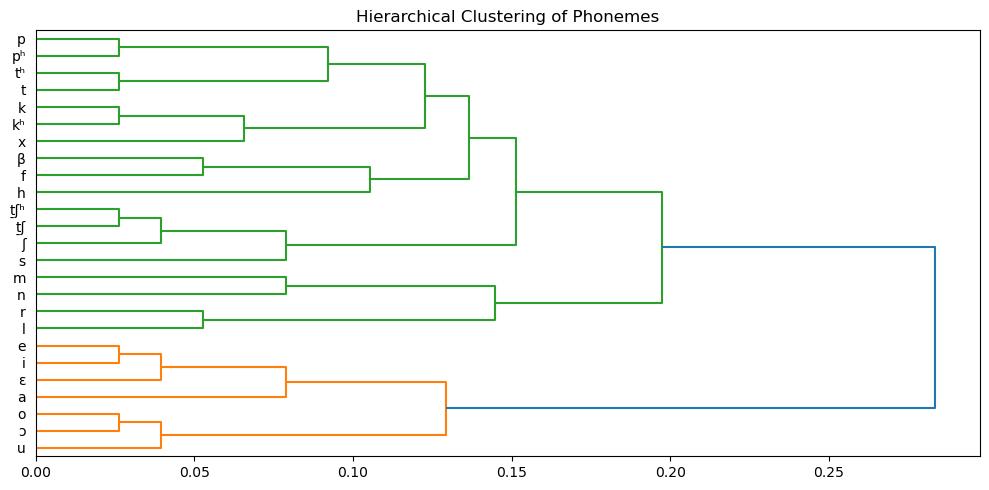

/tmp/ipykernel_35069/3663722461.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return feature_matrix.loc[list(phonemes)].replace({'+': 1, '-': 0, '+,-': 1, '-,+': 1}).fillna(0).astype(int)


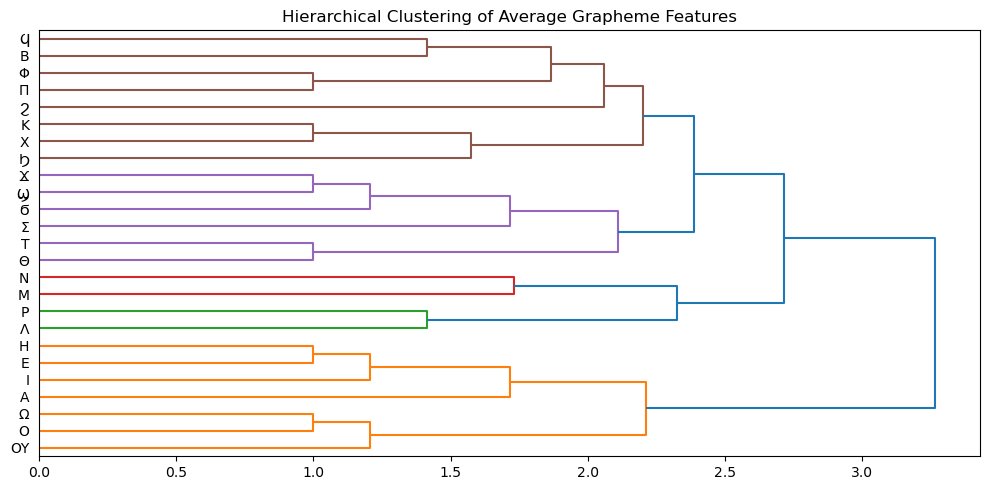

In [147]:
Z, df = phoneme_clusters(bohairic_correspondences)
plt.figure(figsize=(10, 5))
dendrogram(Z, labels=df.index.tolist(), orientation='right')
plt.title("Hierarchical Clustering of Phonemes")
plt.tight_layout()
plt.show()

Z, df = grapheme_clusters(bohairic_correspondences)
plt.figure(figsize=(10, 5))
dendrogram(Z, labels=df.index.tolist(), orientation='right')
plt.title("Hierarchical Clustering of Average Grapheme Features")
plt.tight_layout()
plt.show()

In [148]:
fayyumic_correspondences = {
    ("i", "ι"),
    ("i", "ει"),
    ("u", "ου"),
    ("e", "η"),
    ("ɛ", "ε"),
    ("o", "ω"),
    ("a", "α"),
    ("p", "π"),
    ("m", "μ"),
    ("f", "ϥ"),
    ("β", "β"),
    ("t", "τ"),
    ("n", "ν"),
    ("s", "σ"),
    ("l", "λ"),
    ("ʃ", "ϣ"),
    ("t̠ʃ", "ϫ"),
    #("j", "ι"),
    ("kʲ", "ϭ"),
    ("k", "κ"),
    ("x", "ϧ"),
    #("w", "ου"),
    ("h", "ϩ"),
}

/tmp/ipykernel_35069/3663722461.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return feature_matrix.loc[list(phonemes)].replace({'+': 1, '-': 0, '+,-': 1, '-,+': 1}).fillna(0).astype(int)


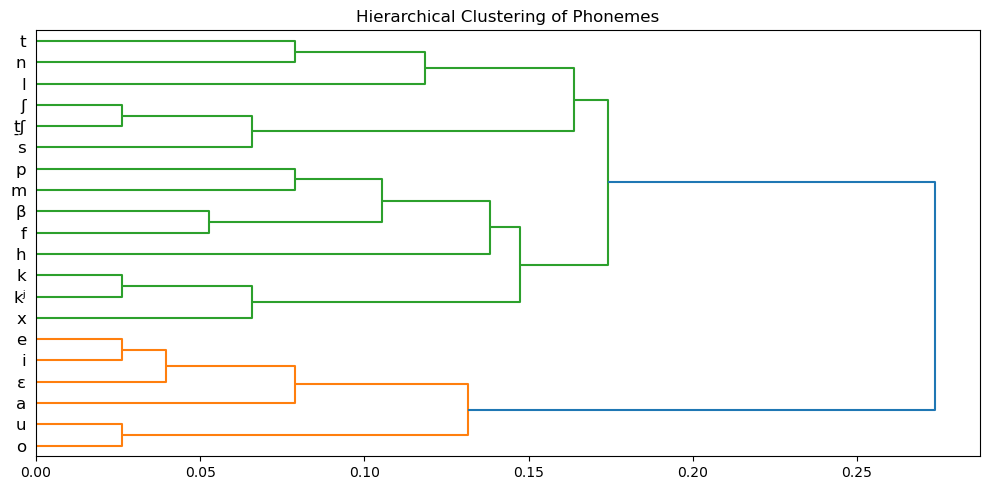

/tmp/ipykernel_35069/3663722461.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return feature_matrix.loc[list(phonemes)].replace({'+': 1, '-': 0, '+,-': 1, '-,+': 1}).fillna(0).astype(int)


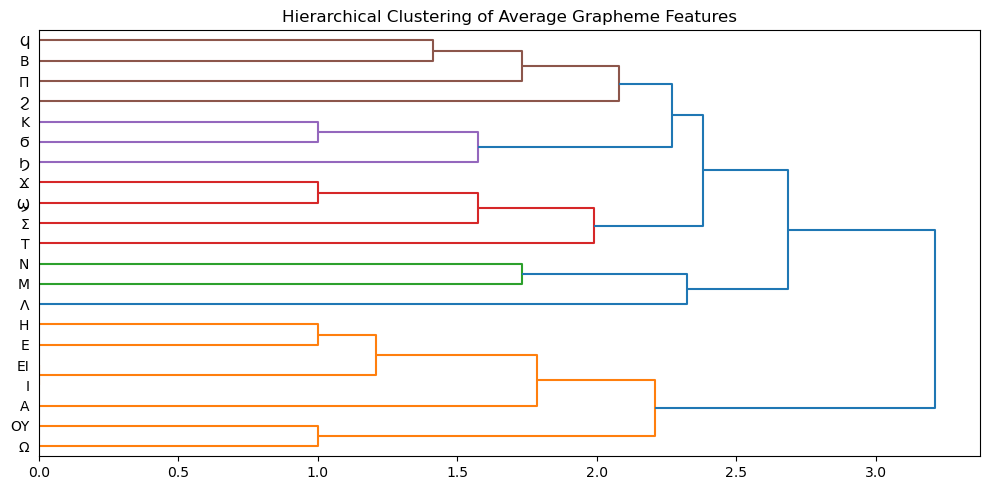

In [149]:
Z, df = phoneme_clusters(fayyumic_correspondences)
plt.figure(figsize=(10, 5))
dendrogram(Z, labels=df.index.tolist(), orientation='right')
plt.title("Hierarchical Clustering of Phonemes")
plt.tight_layout()
plt.show()

Z, df = grapheme_clusters(fayyumic_correspondences)
plt.figure(figsize=(10, 5))
dendrogram(Z, labels=df.index.tolist(), orientation='right')
plt.title("Hierarchical Clustering of Average Grapheme Features")
plt.tight_layout()
plt.show()

/tmp/ipykernel_35069/3663722461.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return feature_matrix.loc[list(phonemes)].replace({'+': 1, '-': 0, '+,-': 1, '-,+': 1}).fillna(0).astype(int)
/tmp/ipykernel_35069/3663722461.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return feature_matrix.loc[list(phonemes)].replace({'+': 1, '-': 0, '+,-': 1, '-,+': 1}).fillna(0).astype(int)
/tmp/ipykernel_35069/3663722461.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To ret

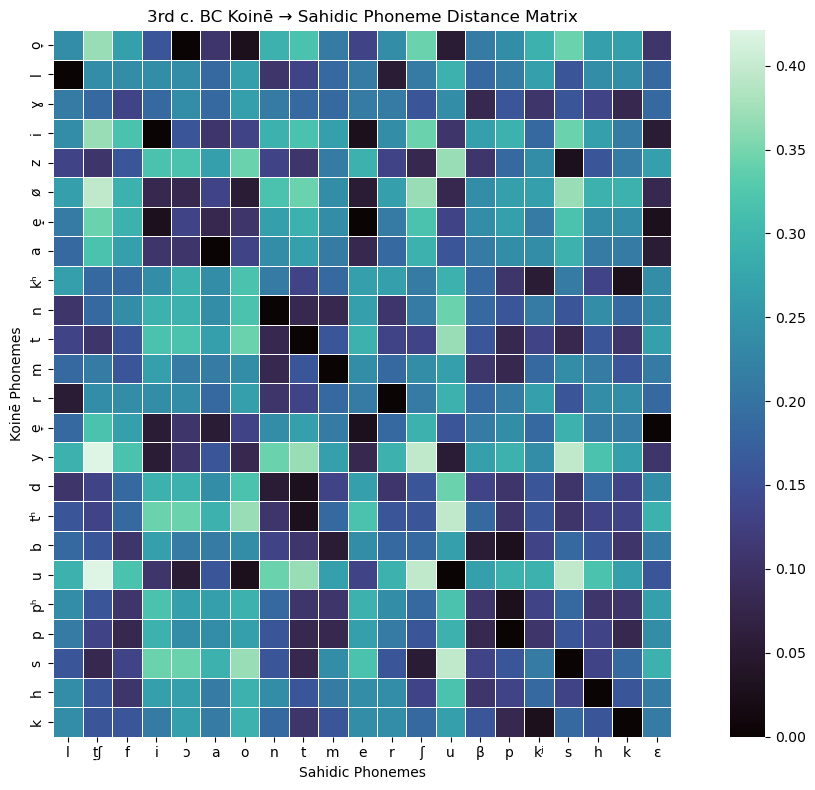

,fit_1,dist_1,fit_2,dist_2,fit_3,dist_3
Phoneme,,,,,,
a,a,0.000000,ɛ,0.052632,e,0.078947
b,p,0.026316,m,0.052632,β,0.052632
d,t,0.026316,n,0.052632,l,0.105263
e̝,e,0.000000,i,0.026316,ɛ,0.026316
e̞,ɛ,0.000000,e,0.026316,i,0.052632
h,h,0.000000,f,0.105263,β,0.105263
i,i,0.000000,e,0.026316,ɛ,0.052632
k,k,0.000000,kʲ,0.026316,p,0.078947
kʰ,k,0.026316,kʲ,0.052632,p,0.105263


In [150]:
D = feature_submatrix(all_phonemes(koine_2_bc_correspondences))
R = feature_submatrix(all_phonemes(sahidic_correspondences))

_, Ddf = grapheme_clusters(koine_4_ad_correspondences)
_, Rdf = grapheme_clusters(sahidic_correspondences)

# D and R are DataFrames: index=phoneme, columns=features encoded 0/1
dist_matrix = pd.DataFrame(
    cdist(D.values, R.values, metric='hamming'),
    index=D.index, columns=R.index
)

plt.figure(figsize=(12, 8))
sns.heatmap(dist_matrix, cmap='mako', annot=False, linewidths=0.5, square=True)
plt.title("3rd c. BC Koinē → Sahidic Phoneme Distance Matrix")
plt.xlabel("Sahidic Phonemes")
plt.ylabel("Koinē Phonemes")
plt.tight_layout()
plt.show()

dist_matrix.apply(top_n_matches, axis=1).sort_index()